In [11]:
# 余分な Warning を非表示にする
import warnings

warnings.filterwarnings('ignore')

# Library の import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib に日本語化
import japanize_matplotlib

# DataFrame 表示用関数
from IPython.display import display

# Originals
from pylab import rcParams
from sklearn.cluster import KMeans

# 表示 Option 調整
# NumPy の浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)
# pandas での浮動小数点の表示速度
pd.options.display.float_format = '{:.4f}'.format
# DataFrame ですべての項目を表示
pd.set_option('display.max_columns', None)
# Graph の Default Font 指定
plt.rcParams['font.size'] = 14
# 乱数の種
random_seed = 123

# 顧客層に応じた販売戦略（Clustering, 次元圧縮）
教師なし学習
- Clustering
- 次元圧縮

の２つ

## 処理 Pattern と想定される業務利用 Sean
### Clustering
- 顧客を数学的手法に基づき Group 分けする。
- グループ分けの根拠は分析者が後から判断しないといけないが、うまく説明がつけば各Group の特性に基づいた営業戦略を考えらえる

### 次元圧縮
- 何十次元や、何百次元のように項目数が多い入力Data を少ない次元に圧縮する数学的手法。
- Data の行列の行（Case)の類似度で Group化するのが Clustering だとすると、列（項目）の類似度で集約するのが次元圧縮の Image.
- 圧縮先した結果を散布図を表示することで特に重要な顧客を見つけられる可能性がある

Clustering と次元圧縮はよく組み合わせて利用される。

## 例題の Data説明と Use case
Dataset: 「Wholesale customers Data Set」（卸売顧客 Dataset）
全部で 440 の顧客Data が含まれる

## Model の概要
### Clustering
- 「分類」との違いは正解Data がない状態で学習をするか、になる。
- 顧客 Marketing などの Use case で役立つことが多く、利用例の多い Pattern

最もよく利用される Ｋ平均法（K-Means）という Algorithm を演習する

### 次元圧縮
機会学習Model の入力Data は、通常数十、場合によっては数百や数千もの項目数になる場合がある。個々の Data がどのようなものなのかを判断しづらくなるため、こうした Data の主要な部分を２次元や３次元に減らせば、散布図で表示できるので個々の Data 間の関係性を視覚的に理解しやすくなる

## Data の読み込みから Data確認まで

In [12]:
# Data 読み込み
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'

df = pd.read_csv(url)

# 日本語に変換
columns = ['販売Chanel', '地域', '生鮮食品', '乳製品', '食料品', '冷凍食品', '洗剤_紙製品', '総菜']
df.columns = columns

In [13]:
# Data確認
display(df.head())

# Size 確認
print(df.shape)

,販売Chanel,地域,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


(440, 8)


In [14]:
# 欠損値確認
print(df.isnull().sum())

販売Chanel    0
地域          0
生鮮食品        0
乳製品         0
食料品         0
冷凍食品        0
洗剤_紙製品      0
総菜          0
dtype: int64


In [15]:
# 販売Chanel の Label値確認
print(df['販売Chanel'].value_counts())
print()

# 地域の Label値確認
print(df['地域'].value_counts())

1    298
2    142
Name: 販売Chanel, dtype: int64

3    316
1     77
2     47
Name: 地域, dtype: int64


販売Chanel の Label値の意味
1. Horeca（Hotel, Restaurant, Cafe)
2. Retail（小売り）

地域の Label値の意味
1. Lisbon（リスボン）
2. Oporto（オポルト or ポルト）
3. Other Region（その他）

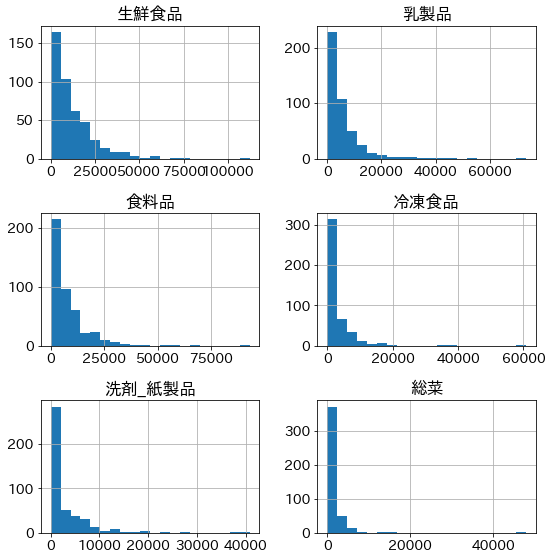

In [16]:
# 販売Chanel と地域を落とした Data を作る
df2 = df.drop(['販売Chanel', '地域'], axis=1)

# 分析対象項目の Histogram 表示
rcParams['figure.figsize'] = (8, 8)
df2.hist(bins=20)
plt.tight_layout()
plt.show()

Histogram の結果から６項目のすべてで、１番購入価格の低い Group の購入頻度が最も多く、購入価格が上がるについれ徐々に件数が減っていく形になっていることがわかった。

## Clustering の実施

In [17]:
# Data 前処理と Data 分割は不要

# Group 数を定義
clusters = 4

# Algorithm の定義
algorithm = KMeans(n_clusters=clusters, random_state=random_seed)

Algorithm は、Clustering で最も一般的に使用されているＫ平均法（k-Means）を採用。
※ Ｋ平均法の注意点として、初期設定の段階で分類後の Group数を決める必要がある。（引数`n_clusters=`で指定）

In [20]:
# 学習、予測の実施
y_pred = algorithm.fit_predict(df2)

# 結果の一部確認
print(y_pred[:20])

[1 2 1 1 0 1 1 1 1 2 2 1 0 2 0 1 2 1 1 1]


教師なし学習の場合、学習と予測は同時に行なう。
